## <font color='red'> Simple Linear regression </font>

### The idea behind this project is, given some vehicle data, to be able to predict the likely emissions of CO2. After identifying a feature that correlates to the Co2 emission, a simple linear regression was used to predict the desired value.




#### Problem and objective

An environmental NGO needs to predict Co2 vehicle emissions to discuss in presentations about auto industry development. There is no necessity for this prediction to be sophisticated since the goal is to use it in hypothetical scenarios. Therefore, some vehicle data was provided with the objective to, given users' input, predict the likely Co2 emissions. Some features in the data were analyzed to find a correlation, and a simple linear regression was created to achieve the NGO goal.

<b>1. Importing the Libraries:</b>




In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
%matplotlib inline

<b>2. Reading data:</b>

In [2]:
car_data = pd.read_csv("Cars.csv", delimiter=",")
car_data[0:5]

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<b>2.1 Considerations about the data:</b>

The data contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. 

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


<b>3. Exploring the dataset:</b>


In [3]:
# summarizing the data
car_data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
# Selecting features for further exploration and find correlation

feat = car_data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
feat.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


We can plot each of these features:


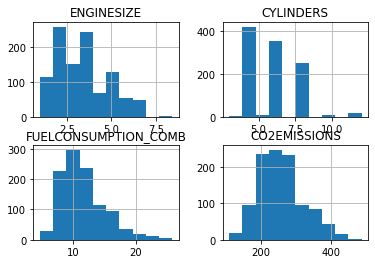

In [5]:
# Plotting the selected features

viz = feat[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
feat.hist()
plt.show()

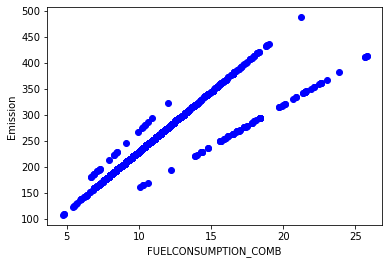

In [6]:
# Plotting the selected features against Emission to identify how linear their relationship is:

plt.scatter(feat.FUELCONSUMPTION_COMB, feat.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

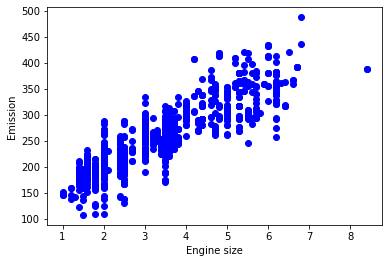

In [7]:
plt.scatter(feat.ENGINESIZE, feat.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

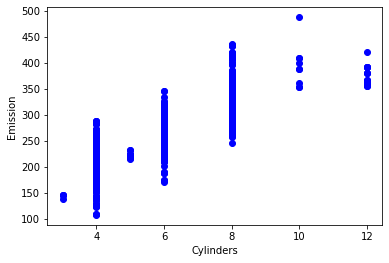

In [8]:
plt.scatter(feat.CYLINDERS, feat.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

In [9]:
# In these plots, it is possible to identify that the linear relationship occurs between Engine Size and CO2 Emissions

<b>4. Splitting data into train and test data:</b>
    

In [10]:
# Considering 80% of the entire dataset will be used for training and 20% for testing. 
# Also, a mask was created to select random rows using np.random.rand() function:
# This is to show a different way to split data rather than with scikit-learn's train_test_split()  

msk = np.random.rand(len(car_data)) < 0.8
train = feat[msk]
test = feat[~msk]

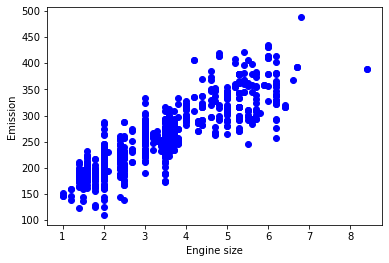

In [11]:
# Confirming Train data distribution

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<b>5. Training the Linear Regression model:</b>

In [12]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)

# Showing coefficients just to demonstrate the maths behind it 
# Coefficient and Intercept are the parameters of the fit line (intercept and slope of the regression line)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[38.52454406]]
Intercept:  [127.3545758]


Text(0, 0.5, 'Emission')

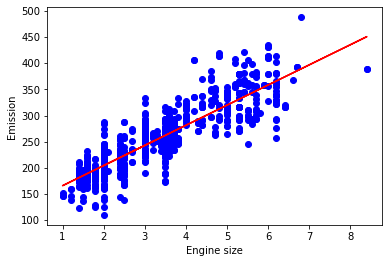

In [13]:
# To further demonstrate the details of linear regression, showing the fit line over the data

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

<b> 6. Evaluating the model:</b>

In [14]:
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 22.66
Residual sum of squares (MSE): 886.90
R2-score: 0.80


<b> 7. Making predictions with user input: </b>

In [15]:
user_data = float(input("Enter the Engine Size value "))
print("CO2 emission will be ",regr.predict([[user_data]]))

Enter the Engine Size value 6.2
CO2 emission will be  [[366.20674901]]
